#**AI-Driven Loyalty Program Optimization for Retail Supermarkets in Kenya**


**Authors:** Sylvia, Clive, Ezekiel, Brenda, Isaiah

#1.**Business** **Understanding**

##Introduction

This project focuses on optimizing loyalty programs for retail supermarkets in Kenya using AI-driven techniques. As the retail landscape becomes increasingly competitive, supermarkets must leverage data to better understand customer behavior and personalize engagement strategies. By analyzing transaction data, customer demographics, and purchasing patterns, this project aims to design intelligent loyalty models that enhance customer retention, increase basket size, and drive long-term value. The integration of machine learning algorithms and predictive analytics will allow for dynamic reward systems and targeted promotions, tailored to the unique preferences and needs of Kenyan consumers.

## Problem Statement

Traditional loyalty programs fail to adapt to customer behavior, leading to:

- Generic campaigns with low engagement.
- Wasted promotional budgets.
- Declining customer retention.

##Objectives

- Develop machine learning models to segment customers based on purchase behavior and loyalty metrics.
- Predict customer churn (defined as no transactions within 90 days) to identify at-risk customers.
- Estimate customer lifetime value (CLV) to prioritize high-value customers.


##Success Criteria

- Achieve at least 80% accuracy in churn prediction.
- Identify distinct customer segments with a silhouette score > 0.5 for clustering.

#2.**Data Understanding**

##Data Sources

We have two main datasets:

- customer_info.csv: Contains customer demographic information

- POS_Transactions.csv: Contains transaction details

## Data Overview

In [ ]:
# Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve,RocCurveDisplay,classification_report
%matplotlib inline

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from xgboost import XGBClassifier

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing data from csv and
customer_df=pd.read_csv('/content/drive/MyDrive/Phase5/customer_info.csv', encoding='ISO-8859-1')
transactions_df=pd.read_csv('/content/drive/MyDrive/Phase5/POS_Transanctions.csv', encoding='ISO-8859-1')

In [ ]:
customer_df.describe()

,loyalty_id,points
count,2.776700e+04,27767.000000
mean,1.957855e+07,1243.571536
std,1.568738e+07,2124.944218
min,4.000000e+00,0.000000
25%,9.012358e+06,216.340000
50%,1.200868e+07,577.000000
75%,3.101227e+07,1478.000000
max,6.601514e+07,163918.000000


In [ ]:
transactions_df.describe()

,PAYMENT_TYPE,PRODUCT_ID,Unnamed: 16
count,1.022369e+06,1.034747e+06,0.0
mean,4.517483e+00,5.568171e+05,NaN
std,2.141840e+00,1.603369e+05,NaN
min,1.000000e+00,1.100010e+05,NaN
25%,2.000000e+00,4.075710e+05,NaN
50%,6.000000e+00,5.261230e+05,NaN
75%,6.000000e+00,7.000060e+05,NaN
max,6.000000e+00,9.899930e+05,NaN


In [ ]:
customer_df.head()

,loyalty_id,first_name,city,country_code,ethnicity,gender,family_status,points,registered_date,registered_location,Customer_VAR1,national_id
0,4,ELIZ,Nairobi,Kenya,Kenyan,Female,Married,2921.56,9/7/2015,RUAKA,Mrs.,1827976
1,24,NGAN,Nairobi,Kenya,Kenyan,Male,Single,2412.00,10/17/2015,RUAKA,Mr.,24120172
2,32,EVA,Nairobi,Kenya,Kenyan,Female,Single,1281.00,11/5/2015,RUAKA,Mrs.,23883273
3,34,TIMO,Nairobi,Kenya,Kenyan,Male,Single,267.00,11/8/2015,RUAKA,Mr.,21853866
4,36,JOHN,Nairobi,Kenya,Kenyan,Male,Single,63.12,11/18/2015,RUAKA,Mr.,29761408


In [ ]:
transactions_df.head()

,TICKET_ID,TICKET_DATE,PAYMENT_TYPE,PRODUCT_ID,DESCRIPTION,CATEGORY,DEPARTMENT,BRAND,REVENUE_VALUE,QTY_SOLD_UNIT,PURCHASE_PRICE,UNIT_PRICE,DISCOUNT,LOYALTY_ID,REDEEMED_POINTS,POINTS_EARNED,Unnamed: 16
0,QM0060236440087,10/1/2024,6.0,661047,HH-QM NON WOVEN PLAIN BAG V25 70GSM,TEXTILE,PACKAGING,QUICKMART,20,1,12,20,NaN,25012986,NaN,0,NaN
1,QM0060334900088,10/1/2024,6.0,661047,HH-QM NON WOVEN PLAIN BAG V25 70GSM,TEXTILE,PACKAGING,QUICKMART,20,1,12,20,NaN,9016420,NaN,0,NaN
2,QM0060536350045,10/1/2024,6.0,661047,HH-QM NON WOVEN PLAIN BAG V25 70GSM,TEXTILE,PACKAGING,QUICKMART,20,1,12,20,NaN,11008074,NaN,0,NaN
3,QM0060436550071,10/1/2024,6.0,661047,HH-QM NON WOVEN PLAIN BAG V25 70GSM,TEXTILE,PACKAGING,QUICKMART,20,1,12,20,NaN,9022233,NaN,0,NaN
4,QM0060334900114,10/1/2024,6.0,661047,HH-QM NON WOVEN PLAIN BAG V25 70GSM,TEXTILE,PACKAGING,QUICKMART,20,1,12,20,NaN,39013061,NaN,0,NaN


In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27767 entries, 0 to 27766
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loyalty_id           27767 non-null  int64  
 1   first_name           27767 non-null  object 
 2   city                 27767 non-null  object 
 3   country_code         27767 non-null  object 
 4   ethnicity            27767 non-null  object 
 5   gender               27767 non-null  object 
 6   family_status        27767 non-null  object 
 7   points               27767 non-null  float64
 8   registered_date      27767 non-null  object 
 9   registered_location  27767 non-null  object 
 10  Customer_VAR1        27767 non-null  object 
 11  national_id          27658 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.5+ MB


In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034747 entries, 0 to 1034746
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   TICKET_ID          1034747 non-null  object 
 1   TICKET_DATE        1034747 non-null  object 
 2   PAYMENT_TYPE       1022369 non-null  float64
 3   PRODUCT_ID         1034747 non-null  int64  
 4   DESCRIPTION        1034747 non-null  object 
 5   CATEGORY           1034747 non-null  object 
 6   DEPARTMENT         1034747 non-null  object 
 7   BRAND              1034747 non-null  object 
 8    REVENUE_VALUE     1022369 non-null  object 
 9    QTY_SOLD_UNIT     1034747 non-null  object 
 10   PURCHASE_PRICE    1022369 non-null  object 
 11   UNIT_PRICE        1022369 non-null  object 
 12   DISCOUNT          168421 non-null   object 
 13  LOYALTY_ID         1034747 non-null  object 
 14   REDEEMED_POINTS   12378 non-null    object 
 15   POINTS_EARNED     1022369 non-n

#3.**Data Preparation**

This will involve cleaning and integrating multiple datasets, including transactional records and customer demographics. Key features such as recency, frequency, monetary value (RFM) and category-level purchases will be engineered to enhance model accuracy. Missing values, inconsistent formats, and outliers will be addressed through standard preprocessing techniques. Data will be aggregated at the customer and transaction level to support segmentation, prediction, and recommendation tasks

##Data Cleaning

### Correct Formats

In [ ]:
#Converting the columns into lower case for both datasets
customer_df.columns = customer_df.columns.str.lower()
transactions_df.columns = transactions_df.columns.str.lower()

In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034747 entries, 0 to 1034746
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ticket_id          1034747 non-null  object 
 1   ticket_date        1034747 non-null  object 
 2   payment_type       1022369 non-null  float64
 3   product_id         1034747 non-null  int64  
 4   description        1034747 non-null  object 
 5   category           1034747 non-null  object 
 6   department         1034747 non-null  object 
 7   brand              1034747 non-null  object 
 8    revenue_value     1022369 non-null  object 
 9    qty_sold_unit     1034747 non-null  object 
 10   purchase_price    1022369 non-null  object 
 11   unit_price        1022369 non-null  object 
 12   discount          168421 non-null   object 
 13  loyalty_id         1034747 non-null  object 
 14   redeemed_points   12378 non-null    object 
 15   points_earned     1022369 non-n

In [ ]:
# Strip column names to avoid hidden whitespaces
customer_df.columns = customer_df.columns.str.strip()
transactions_df.columns = transactions_df.columns.str.strip()

In [ ]:
#Converting the registered date column and ticket date to date format
customer_df['registered_date'] = pd.to_datetime(customer_df['registered_date'])
transactions_df['ticket_date'] = pd.to_datetime(transactions_df['ticket_date'], errors='coerce')


In [ ]:
#Converting the loyalty column to object to have the same formart in both datasets
customer_df['loyalty_id'] = customer_df['loyalty_id'].astype('object')


In [ ]:
#Convert quantity column to numeric
transactions_df['product_id'] = pd.to_numeric(transactions_df['product_id'], errors='coerce').astype('Int64')
transactions_df['points_earned'] = pd.to_numeric(transactions_df['points_earned'], errors='coerce').astype('Int64')
transactions_df['qty_sold_unit'] = pd.to_numeric(transactions_df['qty_sold_unit'], errors='coerce').astype('Int64')

In [ ]:
cols_to_convert = ['revenue_value', 'unit_price', 'discount']
for col in cols_to_convert:
    transactions_df[col] = pd.to_numeric(transactions_df[col], errors='coerce')

### Handling Mising values

In [ ]:
print(customer_df.isnull().sum())

loyalty_id               0
first_name               0
city                     0
country_code             0
ethnicity                0
gender                   0
family_status            0
points                   0
registered_date          0
registered_location      0
customer_var1            0
national_id            109
dtype: int64


In [ ]:
print(transactions_df.isnull().sum())

ticket_id                0
ticket_date              0
payment_type         12378
product_id               0
description              0
category                 0
department               0
brand                    0
revenue_value        56916
qty_sold_unit        12378
purchase_price       12378
unit_price           49703
discount            867294
loyalty_id               0
redeemed_points    1022369
points_earned        12810
unnamed: 16        1034747
dtype: int64


In [ ]:
# Dropping unneccesary columns
drop_columns = ["redeemed_points", "unnamed: 16", "payment_type", "purchase_price"]
transactions_df = transactions_df.drop(drop_columns, axis =1)

In [ ]:
dropped_columns = ["ethnicity", "customer_var1", "national_id", "family_status", "city"]
customer_df = customer_df.drop(dropped_columns, axis =1)

In [ ]:
customer_df.shape

(27767, 7)

In [ ]:
transactions_df.shape

(1034747, 13)

In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034747 entries, 0 to 1034746
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   ticket_id      1034747 non-null  object        
 1   ticket_date    1034747 non-null  datetime64[ns]
 2   product_id     1034747 non-null  Int64         
 3   description    1034747 non-null  object        
 4   category       1034747 non-null  object        
 5   department     1034747 non-null  object        
 6   brand          1034747 non-null  object        
 7   revenue_value  977831 non-null   float64       
 8   qty_sold_unit  1022369 non-null  Int64         
 9   unit_price     985044 non-null   float64       
 10  discount       167453 non-null   float64       
 11  loyalty_id     1034747 non-null  object        
 12  points_earned  1021937 non-null  Int64         
dtypes: Int64(3), datetime64[ns](1), float64(3), object(6)
memory usage: 105.6+ MB


In [ ]:
#Drop rows where quantity is <= 0
transactions_df = transactions_df[transactions_df['qty_sold_unit'] > 0]

#Drop rows where revenue value is <= 0
transactions_df = transactions_df[transactions_df['revenue_value'] > 0]

In [ ]:
#Fill discount and unit price null values with zero
transactions_df['discount'] = transactions_df['discount'].fillna(0)
transactions_df['points_earned'] = transactions_df['points_earned'].fillna(0)

In [ ]:
transactions_df['unit_price'] = transactions_df['unit_price'].fillna(transactions_df['unit_price'].median())

### Handling Duplicates

In [ ]:
# Duplicates
print("\nDuplicate Rows:")
print("Customers:", customer_df.duplicated().sum())
print("Transactions:", transactions_df.duplicated().sum())


Duplicate Rows:
Customers: 0
Transactions: 17


In [ ]:
transactions_df = transactions_df.drop_duplicates()

In [ ]:
print("Transactions:", transactions_df.duplicated().sum())

Transactions: 0


In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945453 entries, 0 to 1022368
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ticket_id      945453 non-null  object        
 1   ticket_date    945453 non-null  datetime64[ns]
 2   product_id     945453 non-null  Int64         
 3   description    945453 non-null  object        
 4   category       945453 non-null  object        
 5   department     945453 non-null  object        
 6   brand          945453 non-null  object        
 7   revenue_value  945453 non-null  float64       
 8   qty_sold_unit  945453 non-null  Int64         
 9   unit_price     945453 non-null  float64       
 10  discount       945453 non-null  float64       
 11  loyalty_id     945453 non-null  object        
 12  points_earned  945453 non-null  Int64         
dtypes: Int64(3), datetime64[ns](1), float64(3), object(6)
memory usage: 103.7+ MB


In [ ]:
print(transactions_df.isnull().sum())

ticket_id        0
ticket_date      0
product_id       0
description      0
category         0
department       0
brand            0
revenue_value    0
qty_sold_unit    0
unit_price       0
discount         0
loyalty_id       0
points_earned    0
dtype: int64


In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27767 entries, 0 to 27766
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loyalty_id           27767 non-null  object        
 1   first_name           27767 non-null  object        
 2   country_code         27767 non-null  object        
 3   gender               27767 non-null  object        
 4   points               27767 non-null  float64       
 5   registered_date      27767 non-null  datetime64[ns]
 6   registered_location  27767 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 1.5+ MB


In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945453 entries, 0 to 1022368
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ticket_id      945453 non-null  object        
 1   ticket_date    945453 non-null  datetime64[ns]
 2   product_id     945453 non-null  Int64         
 3   description    945453 non-null  object        
 4   category       945453 non-null  object        
 5   department     945453 non-null  object        
 6   brand          945453 non-null  object        
 7   revenue_value  945453 non-null  float64       
 8   qty_sold_unit  945453 non-null  Int64         
 9   unit_price     945453 non-null  float64       
 10  discount       945453 non-null  float64       
 11  loyalty_id     945453 non-null  object        
 12  points_earned  945453 non-null  Int64         
dtypes: Int64(3), datetime64[ns](1), float64(3), object(6)
memory usage: 103.7+ MB


## Exploratory Data Analysis(EDA)

Customer Demographic Analysis

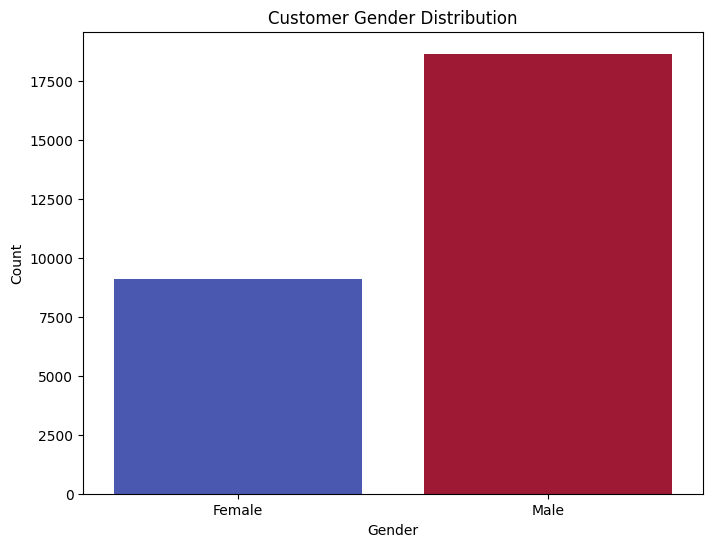

In [ ]:
# Gender distribution
import matplotlib.cm as cm

# Get unique categories in gender column

categories = customer_df['gender'].unique()
num_categories = len(categories)
colors = cm.coolwarm(np.linspace(0, 1, num_categories))
color_palette = dict(zip(categories, colors))

plt.figure(figsize=(8, 6))
sns.countplot(data=customer_df, x='gender', palette=color_palette)
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Behavior and Spend Patterns

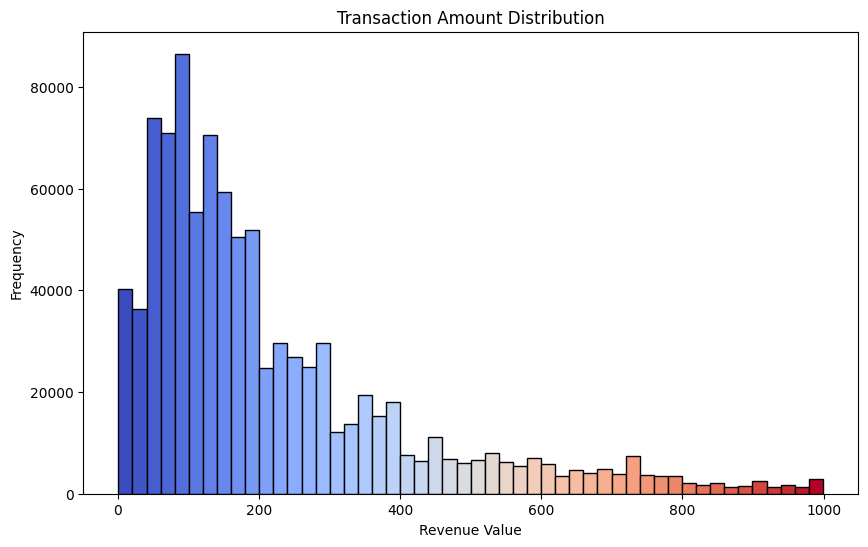

In [ ]:
# Transaction amount distribution
# Prepare data
import matplotlib.colors as mcolors  # renamed to avoid conflict

# Prepare data
data = transactions_df['revenue_value']
bins = 50

# Create histogram data
counts, bin_edges = np.histogram(data, bins=bins)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Normalize bin centers for colormap
norm = mcolors.Normalize(vmin=min(bin_centers), vmax=max(bin_centers))
cmap = cm.get_cmap('coolwarm')
bar_colors = cmap(norm(bin_centers))

# Plot histogram with colored bars
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=np.diff(bin_edges), color=bar_colors, edgecolor='black')
plt.title('Transaction Amount Distribution')
plt.xlabel('Revenue Value')
plt.ylabel('Frequency')
plt.show()

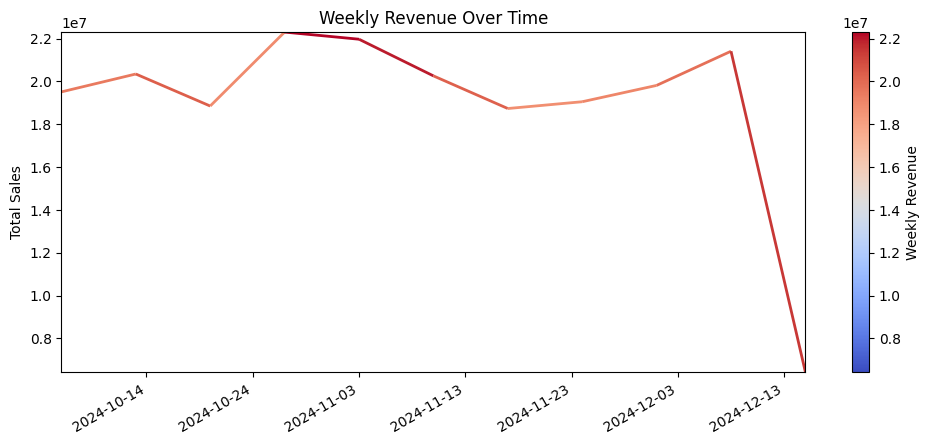

In [ ]:
# Transactions over time
from matplotlib.collections import LineCollection
import matplotlib.dates as mdates

# Ensure datetime format
transactions_df['ticket_date'] = pd.to_datetime(transactions_df['ticket_date'])

# Resample revenue weekly
weekly_revenue = transactions_df.set_index('ticket_date')['revenue_value'].resample('W').sum()
x = mdates.date2num(weekly_revenue.index)  # Convert datetime to numeric
y = weekly_revenue.values

# Create line segments
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Normalize and create LineCollection
norm = mcolors.Normalize(vmin=min(y), vmax=max(y))
cmap = cm.get_cmap('coolwarm')
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(y)
lc.set_linewidth(2)

# Plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.add_collection(lc)
ax.set_xlim(x[0], x[-1])
ax.set_ylim(min(y), max(y))
ax.set_title('Weekly Revenue Over Time')
ax.set_ylabel('Total Sales')

# Format the x-axis back to dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

# Add colorbar
cbar = plt.colorbar(lc, ax=ax)
cbar.set_label('Weekly Revenue')

plt.show()

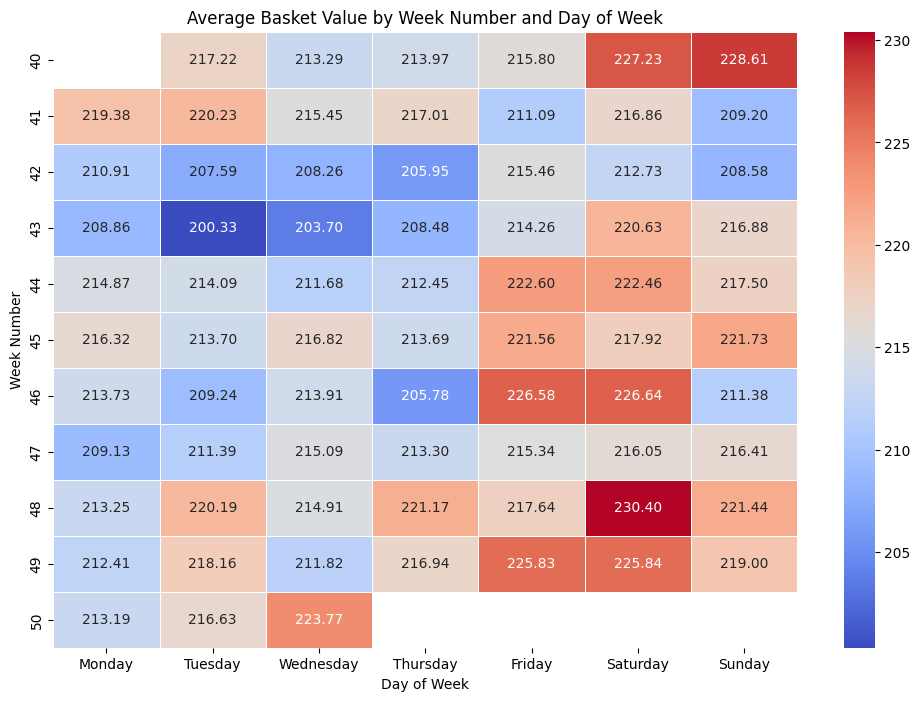

In [ ]:
# Relationship between day and basket values.
transactions_df['ticket_date'] = pd.to_datetime(transactions_df['ticket_date'])

# Calculate average basket value per ticket
basket_values = transactions_df.groupby(['ticket_id', 'ticket_date'])['revenue_value'].mean().reset_index()

# Extract week number and day of week
basket_values['week_num'] = basket_values['ticket_date'].dt.isocalendar().week
basket_values['day_of_week'] = basket_values['ticket_date'].dt.day_name()

# Pivot to get matrix for heatmap: index=week_num, columns=day_of_week, values=avg basket value
heatmap_data = basket_values.pivot_table(
    index='week_num',
    columns='day_of_week',
    values='revenue_value',
    aggfunc='mean'
)

# Order days of week properly
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data[ordered_days]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5, annot=True, fmt=".2f")
plt.title("Average Basket Value by Week Number and Day of Week")
plt.ylabel("Week Number")
plt.xlabel("Day of Week")
plt.show()

Discount Distribution

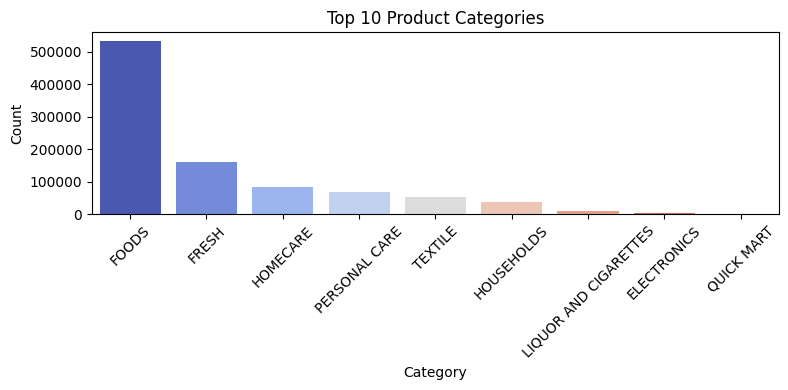

In [ ]:
# Top categories
if 'category' in transactions_df.columns:
    top_cats = transactions_df['category'].value_counts().head(10)

    # Generate coolwarm colors for the bars
    cmap = cm.get_cmap('coolwarm')
    colors = cmap(np.linspace(0, 1, len(top_cats)))

    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_cats.index, y=top_cats.values, palette=colors)
    plt.title("Top 10 Product Categories")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.xlabel("Category")
    plt.tight_layout()
    plt.show()


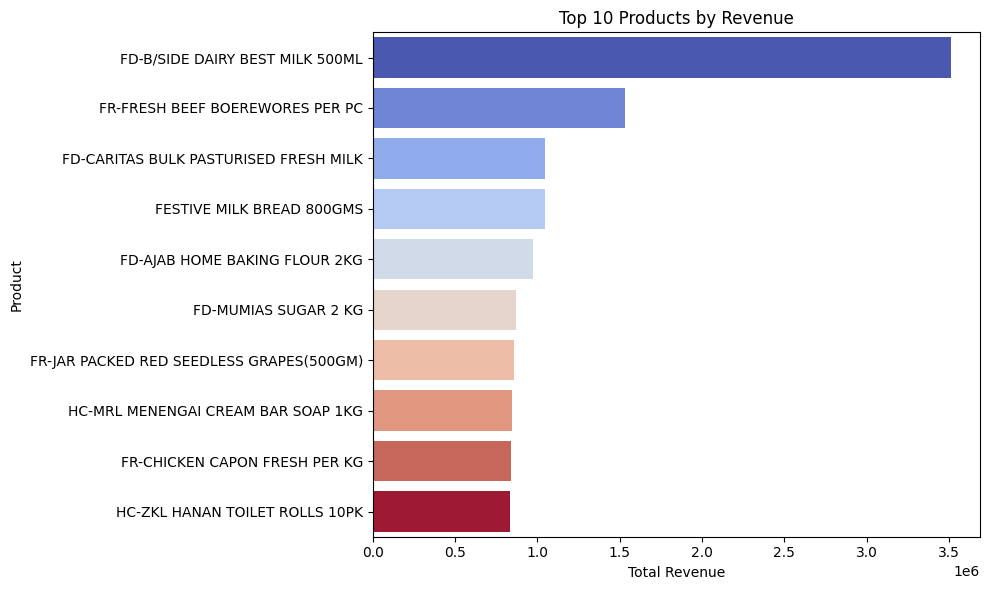

In [ ]:
#Top Products
top_products = transactions_df.groupby('description')['revenue_value'] \
                              .sum().sort_values(ascending=False).head(10)

# Generate coolwarm colors
cmap = cm.get_cmap('coolwarm')
colors = cmap(np.linspace(0, 1, len(top_products)))

# Plot horizontal bar chart with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette=colors)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

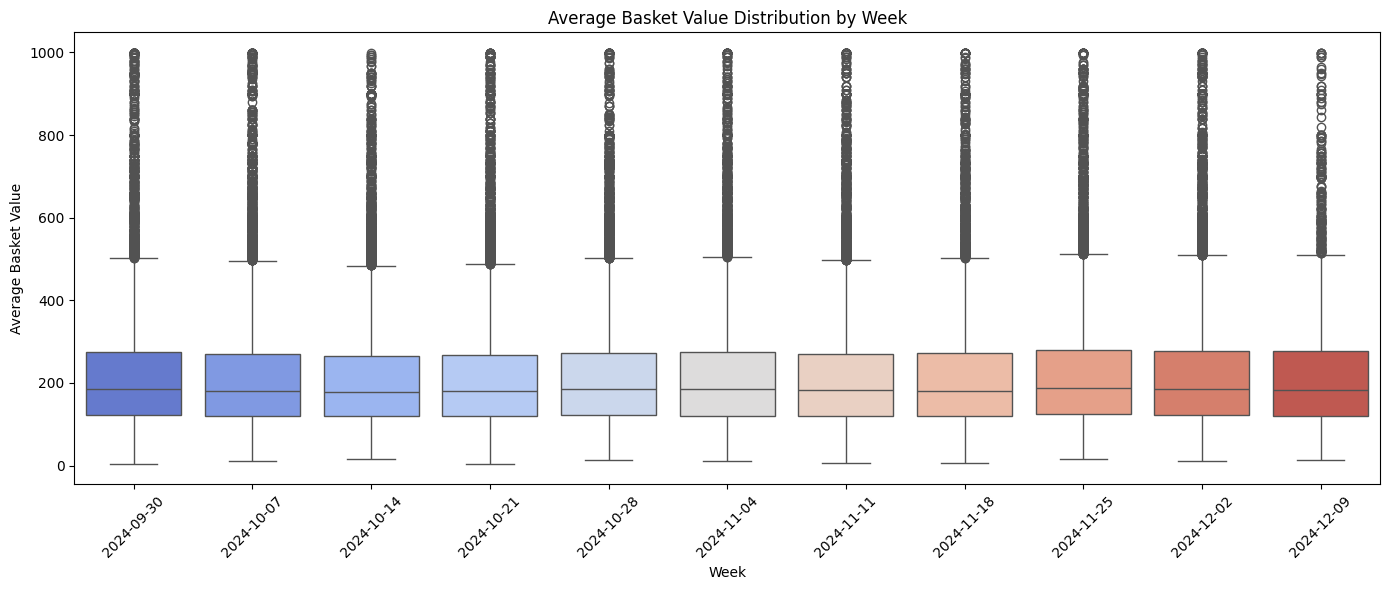

In [ ]:
#Average basket size
transactions_df['ticket_date'] = pd.to_datetime(transactions_df['ticket_date'])

# Calculate average basket value per ticket
basket_values = transactions_df.groupby(['ticket_id', 'ticket_date'])['revenue_value'].mean().reset_index()

# Convert ticket_date to week period
basket_values['week'] = basket_values['ticket_date'].dt.to_period('W').apply(lambda r: r.start_time)

# Plot boxplot grouped by week
plt.figure(figsize=(14, 6))
sns.boxplot(data=basket_values, x='week', y='revenue_value', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Average Basket Value Distribution by Week")
plt.xlabel("Week")
plt.ylabel("Average Basket Value")
plt.tight_layout()
plt.show()

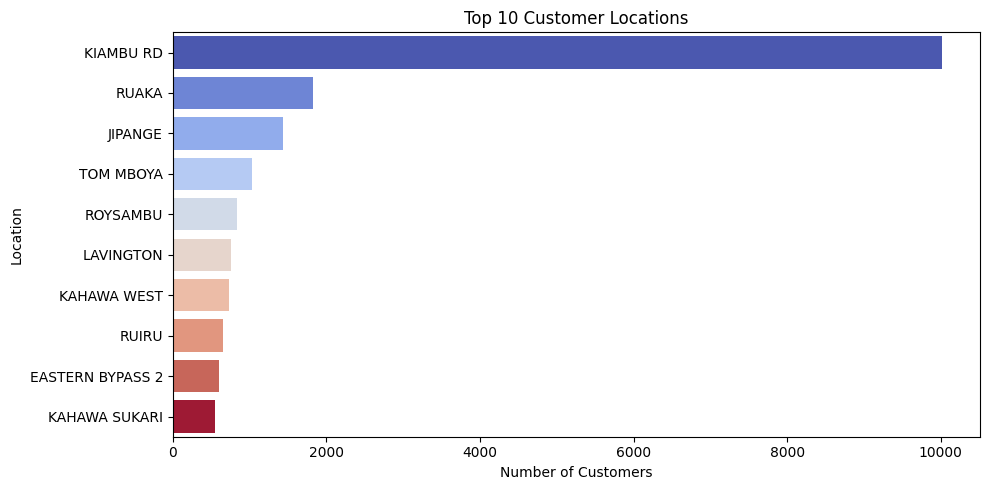

In [ ]:
# Geographic Distribution — Top 10 Locations
if 'registered_location' in customer_df.columns:
    top_locations = customer_df['registered_location'].value_counts().nlargest(10).index
    top_location_data = customer_df[customer_df['registered_location'].isin(top_locations)]

    # Create coolwarm colors for bars
    counts = top_location_data['registered_location'].value_counts()
    cmap = cm.get_cmap('coolwarm')
    colors = cmap(np.linspace(0, 1, len(counts)))

    plt.figure(figsize=(10, 5))
    sns.countplot(
        y='registered_location',
        data=top_location_data,
        order=counts.index,
        palette=colors
    )
    plt.title("Top 10 Customer Locations")
    plt.xlabel("Number of Customers")
    plt.ylabel("Location")
    plt.tight_layout()
    plt.show()


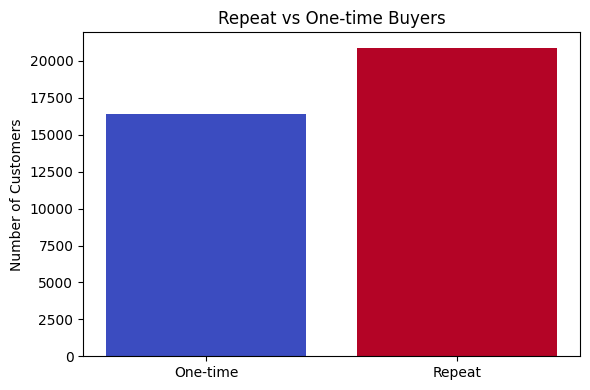

In [ ]:
#Repeat vs Onetime

buyer_freq = transactions_df.groupby('loyalty_id')['ticket_id'].nunique()
repeat_buyers = (buyer_freq > 1).sum()
one_time_buyers = (buyer_freq == 1).sum()

labels = ['One-time', 'Repeat']
values = [one_time_buyers, repeat_buyers]

# Get coolwarm colors for 2 bars
cmap = cm.get_cmap('coolwarm')
colors = cmap(np.linspace(0, 1, len(values)))

plt.figure(figsize=(6,4))
plt.bar(labels, values, color=colors)
plt.title("Repeat vs One-time Buyers")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


## Feature Engineering

### Merging the datasets

In [ ]:
# Merge
merged_df = transactions_df.merge(customer_df['loyalty_id'], on='loyalty_id', how='inner')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30744 entries, 0 to 30743
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ticket_id      30744 non-null  object        
 1   ticket_date    30744 non-null  datetime64[ns]
 2   product_id     30744 non-null  Int64         
 3   description    30744 non-null  object        
 4   category       30744 non-null  object        
 5   department     30744 non-null  object        
 6   brand          30744 non-null  object        
 7   revenue_value  30744 non-null  float64       
 8   qty_sold_unit  30744 non-null  Int64         
 9   unit_price     30744 non-null  float64       
 10  discount       30744 non-null  float64       
 11  loyalty_id     30744 non-null  object        
 12  points_earned  30744 non-null  Int64         
dtypes: Int64(3), datetime64[ns](1), float64(3), object(6)
memory usage: 3.1+ MB


In [ ]:
customer_features = merged_df.groupby('loyalty_id').agg({
    'revenue_value': ['sum', 'mean'],
    'qty_sold_unit': 'sum',
    'points_earned': 'sum',
    'ticket_date': ['min', 'max', 'count']
})

customer_features.columns = ['_'.join(col) for col in customer_features.columns]
customer_features.reset_index(inplace=True)

customer_features['recency'] = (merged_df['ticket_date'].max() - customer_features['ticket_date_max']).dt.days
customer_features['frequency'] = customer_features['ticket_date_count']
customer_features['monetary'] = customer_features['revenue_value_sum']

#4.**Modeling**

In [ ]:
customer_features['loyalCustomer'] = (customer_features['frequency'] > customer_features['frequency'].median()).astype(int)

X = customer_features[['recency', 'monetary', 'points_earned_sum']]
y = customer_features['loyalCustomer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1240
           1       0.79      0.78      0.79       753

    accuracy                           0.84      1993
   macro avg       0.83      0.83      0.83      1993
weighted avg       0.84      0.84      0.84      1993


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1240
           1       0.83      0.77      0.80       753

    accuracy                           0.85      1993
   macro avg       0.85      0.84      0.84      1993
weighted avg       0.85      0.85      0.85      1993


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1240
           1       0.77      0.75      0.76       753

    accuracy                           0.82      1993
   macro

In [ ]:
xgb_model = XGBClassifier(
    max_depth=4,
    n_estimators=100,
    learning_rate=0.1,
    reg_alpha=1.0,    # L1 penalty (like Lasso)
    reg_lambda=1.0,   # L2 penalty (like Ridge)
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print("XGBoost with Regularization:")
print(classification_report(y_test, y_pred))

XGBoost with Regularization:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1240
           1       0.86      0.77      0.81       753

    accuracy                           0.87      1993
   macro avg       0.86      0.85      0.85      1993
weighted avg       0.87      0.87      0.86      1993



#Improving the churn prediction with RandomOverSampler and GridSearchCV

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1240
           1       0.78      0.81      0.79       753

    accuracy                           0.84      1993
   macro avg       0.83      0.83      0.83      1993
weighted avg       0.84      0.84      0.84      1993

ROC-AUC Score: 0.924206935698068


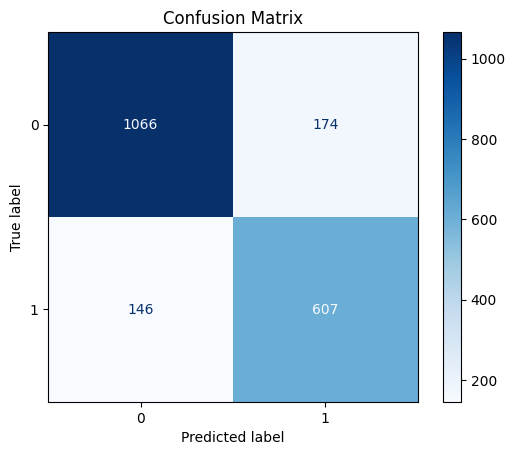

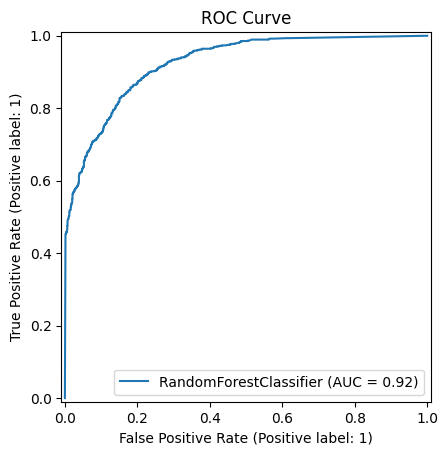

In [ ]:

# Improved Churn Prediction with RandomOverSampler and GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import GridSearchCV

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()


##Clustering

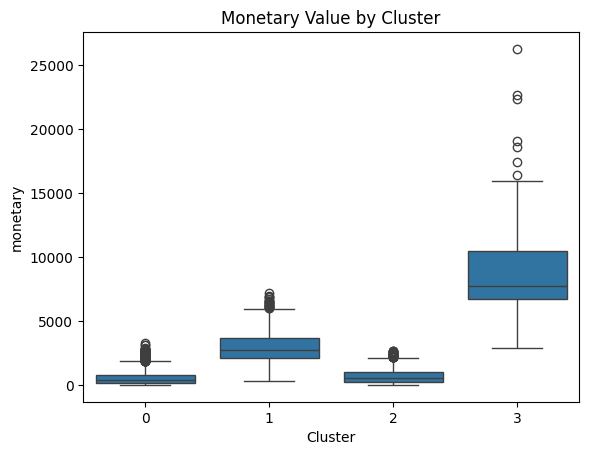

In [ ]:
rfm = customer_features[['recency', 'frequency', 'monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(rfm_scaled)

sns.boxplot(x='Cluster', y='monetary', data=customer_features)
plt.title("Monetary Value by Cluster")
plt.show()

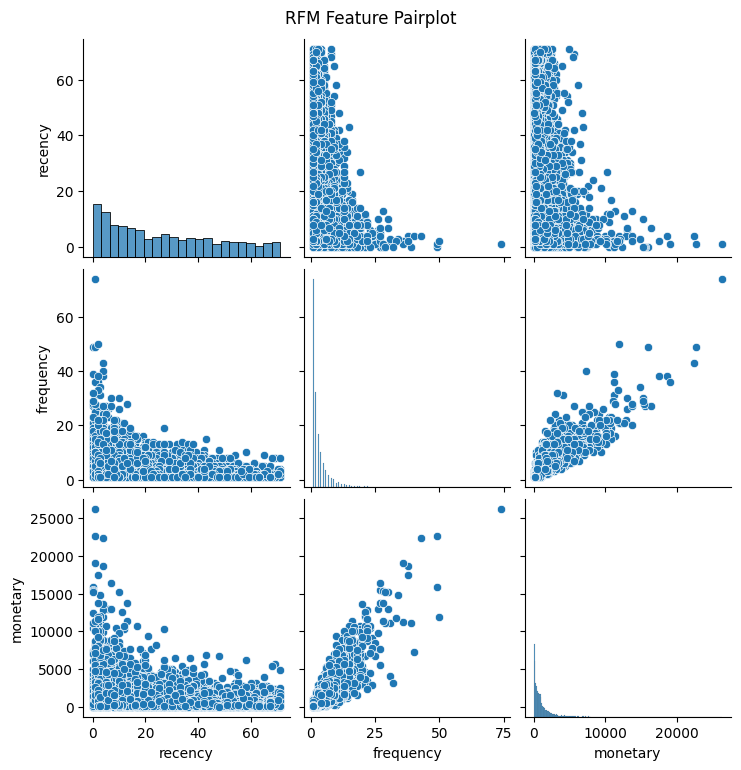

In [ ]:
sns.pairplot(customer_features[['recency', 'frequency', 'monetary']])
plt.suptitle("RFM Feature Pairplot", y=1.02)
plt.show()

Improving the clustering with Silhoutte Score and PCA

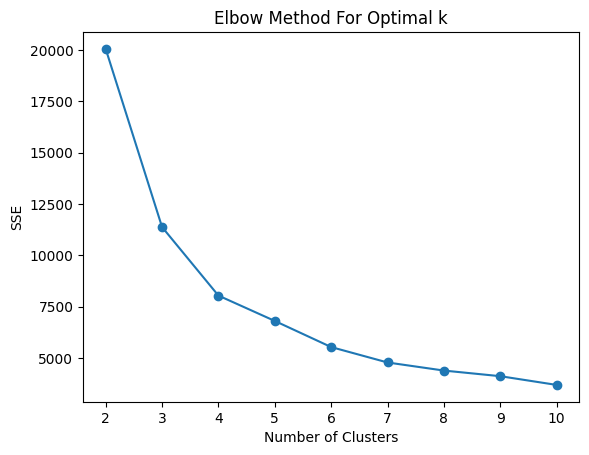

Silhouette Score for k=2: 0.380
Silhouette Score for k=3: 0.445
Silhouette Score for k=4: 0.457
Silhouette Score for k=5: 0.382


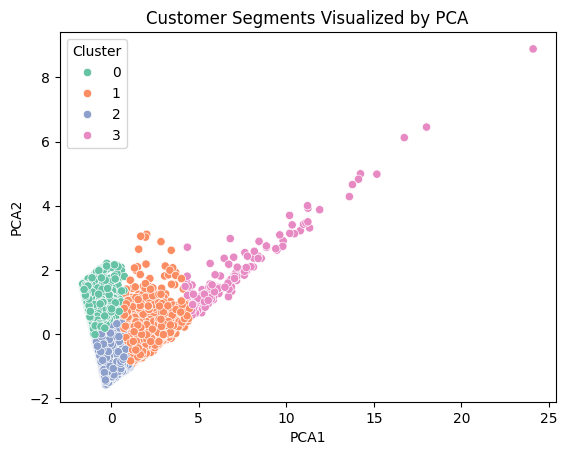

In [ ]:

# Improved Clustering with Silhouette Score and PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#rfm_scaled = scaler.fit_transform(rfm)

# Elbow Method
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

# Silhouette Score
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    print(f'Silhouette Score for k={k}: {score:.3f}')

# Final Model
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(rfm_scaled)

# PCA Visualization
pca = PCA(n_components=2)
components = pca.fit_transform(rfm_scaled)
customer_features['PCA1'] = components[:, 0]
customer_features['PCA2'] = components[:, 1]

sns.scatterplot(data=customer_features, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Customer Segments Visualized by PCA')
plt.show()


##Deep Learning Models- MLP Model

In [ ]:
#MLP model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',         # Monitor validation loss
    patience=5,                 # Stop after 5 epochs with no improvement
    restore_best_weights=True  # Roll back to best model weights
)

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5876 - loss: 21.4048 - val_accuracy: 0.7691 - val_loss: 1.2534
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6990 - loss: 3.7027 - val_accuracy: 0.7980 - val_loss: 0.5388
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7161 - loss: 1.1716 - val_accuracy: 0.7811 - val_loss: 0.4947
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7607 - loss: 0.6522 - val_accuracy: 0.7854 - val_loss: 0.4525
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7768 - loss: 0.5179 - val_accuracy: 0.8419 - val_loss: 0.4235
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7849 - loss: 0.4973 - val_accuracy: 0.8231 - val_loss: 0.3918
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7978 - loss: 0.4663 - val_accuracy: 0.8218 - val_loss: 0.3965
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7871 - loss: 0.4656 - val_accuracy: 0

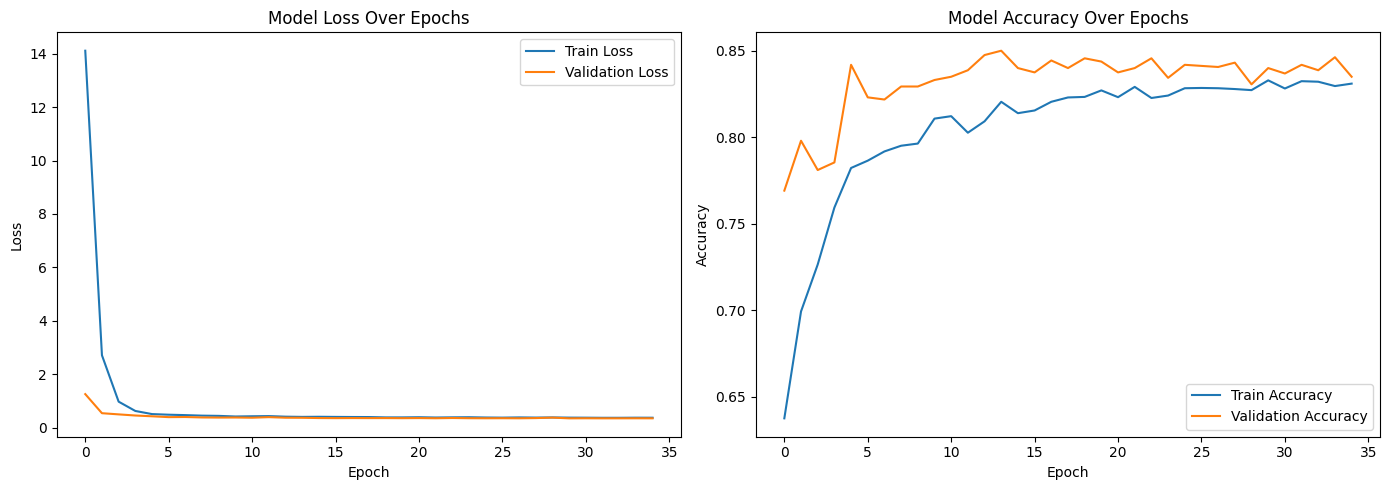

In [ ]:

# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#5.**Evaluation**

#6.**Deployment**